<a href="https://colab.research.google.com/github/Mrunmaigaikwad1/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic = pd.read_csv('/content/titanic.csv')


In [ ]:
# Check for missing values
missing_values = titanic.isnull().sum()
print(missing_values)


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)


<ipython-input-3-45c775f883ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [ ]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


<ipython-input-4-7fc35df1c408>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [ ]:
titanic.drop(columns=['deck'], inplace=True)  # Remove the column


In [ ]:
print(titanic.describe())  # Numerical summary
print(titanic.describe(include='object'))  # Categorical summary


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
         sex embarked  class  who  embark_town alive
count    891      891    891  891          889   891
unique     2        3      3    3            3     2
top     male        S  Third  man  Southampton    no
freq     577      646    491  537          644   549


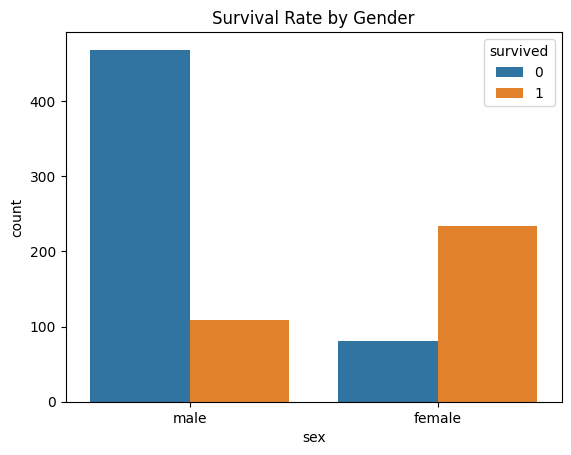

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of survival by gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()


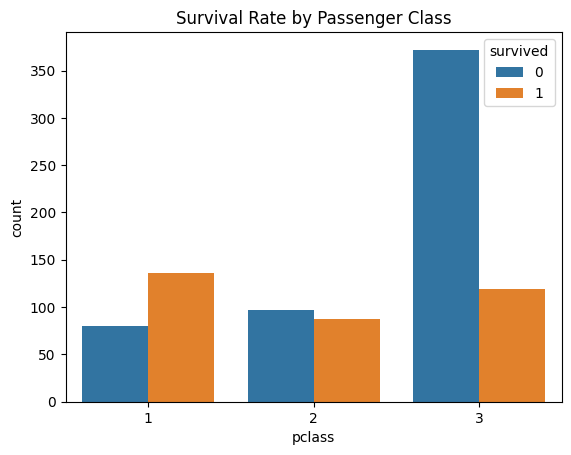

In [ ]:
# Bar plot of survival by class
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()


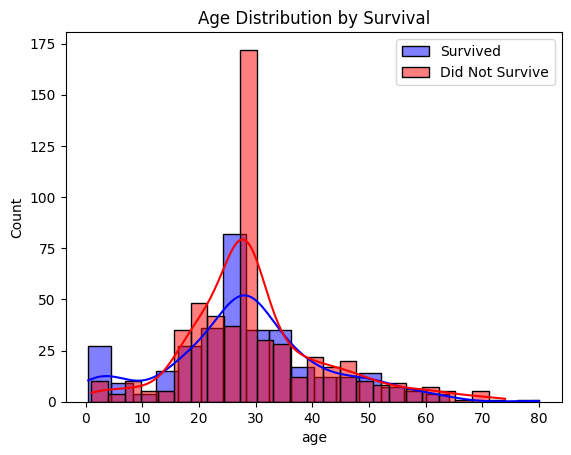

In [ ]:
# Histogram of age distribution
sns.histplot(titanic[titanic['survived'] == 1]['age'], color='blue', label='Survived', kde=True)
sns.histplot(titanic[titanic['survived'] == 0]['age'], color='red', label='Did Not Survive', kde=True)
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()


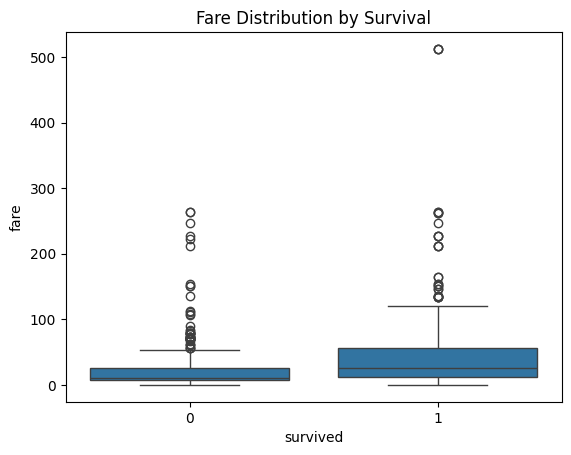

In [ ]:
# Box plot of fare by survival status
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('Fare Distribution by Survival')
plt.show()


In [ ]:
# Convert 'sex' column to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})



In [ ]:
# Map 'class' to numeric values
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})



# Drop the 'class' column if 'pclass' serves the same purpose
titanic.drop(columns=['class'], inplace=True)


In [ ]:
# Map 'who' to numeric values
titanic['who'] = titanic['who'].map({'man': 0, 'woman': 1, 'child': 2})


# Drop the 'deck' column only if it exists
titanic.drop(columns=['deck'], inplace=True, errors='ignore')




In [ ]:
# Map 'embarked' column to numeric values
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


# Drop 'embark_town' to avoid redundancy
titanic.drop(columns=['embark_town'], inplace=True)

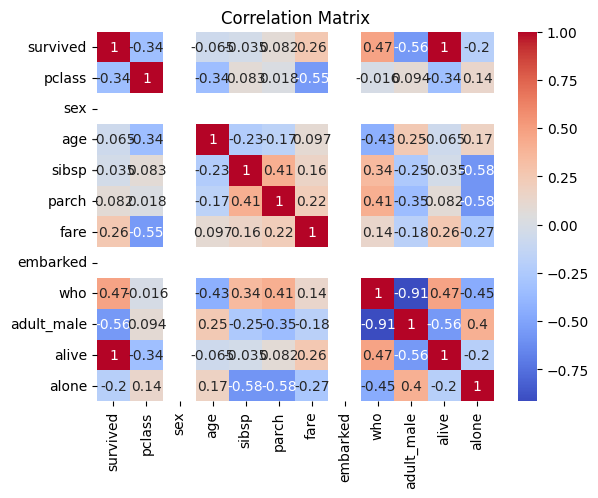

In [ ]:
# Convert relevant categorical columns to numeric if needed
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # assuming embarked categories

# Identify and convert columns with 'no' values to numeric
for col in titanic.select_dtypes(include=['object']).columns:
    if titanic[col].str.contains('no', na=False).any():  # Check if column contains 'no'
        # Assuming 'no' represents 0 and other values represent 1
        titanic[col] = titanic[col].map({'no': 0, 'yes':1}).astype(int)

# Now, calculate the correlation matrix
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt